In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [157]:
fifa = pd.read_csv('/home/juto/Desktop/matplotlib/reference/matplotlib_tutorial/fifa_data.csv')
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [158]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Histograms ###

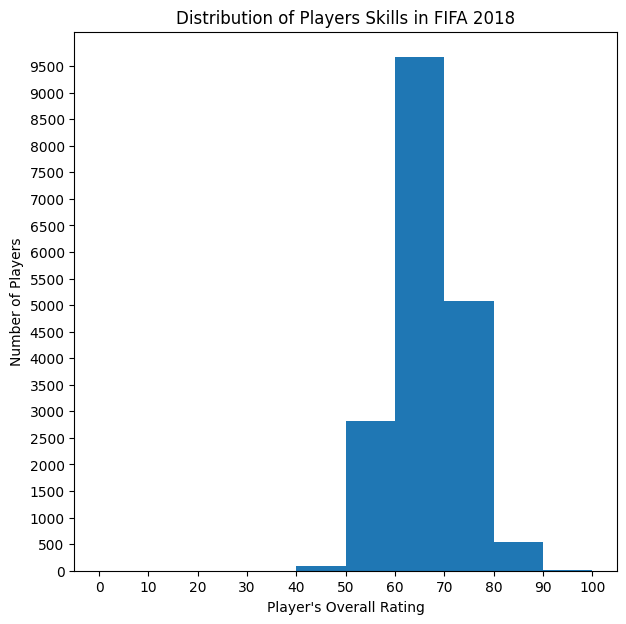

In [159]:
plt.figure(figsize=(7,7))
bins = [0,10,20,30,40,50,60,70,80,90,100]

plt.hist(fifa.Overall, bins= bins)

plt.xticks(bins)
plt.yticks(np.arange(0, 10000, 500))

plt.xlabel('Player\'s Overall Rating')
plt.ylabel('Number of Players')
plt.title('Distribution of Players Skills in FIFA 2018')
plt.show()

## plot a pie chart

In [160]:
fifa.Weight

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object

/tmp/ipykernel_392341/3432034733.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
/tmp/ipykernel_392341/3432034733.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]


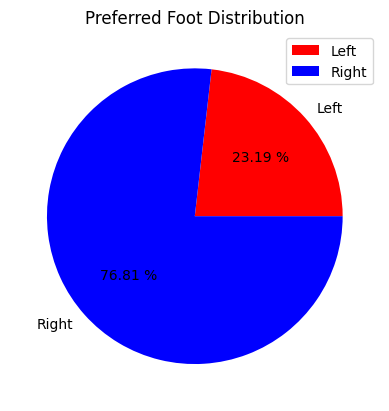

In [161]:
"""
    trying the count the number of players who prefer to play with their left foot
    and then turn that to a pie chart
    """
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]
colors = ['red', 'blue']
plt.pie([left, right], labels=['Left', 'Right'], colors = colors, autopct="%.2f %%")
plt.title('Preferred Foot Distribution')

plt.legend()
plt.show()

In [182]:
sample = np.array([np.random.rand(1,6)])

for x in sample:
    print(sample)


[[[0.87985881 0.66285373 0.12360581 0.56323451 0.09087802 0.46677942]]]


In [176]:
"""
fifa['Weight'] = fifa['Weight'].apply(lambda x: x.replace('lbs', ''))
"""

fifa['Weight'].fillna(0)
fifa['Weight'] = fifa['Weight'].astype(str).apply(lambda x: x.strip('lbs')).astype(float)
